# figure2a

In [7]:
# requirements

import sys
sys.path.append("../../src")
from infernal_tools import CMReader
import matplotlib.pyplot as plt 
from Bio import SeqIO
from Bio.Seq import Seq
import re, os
import numpy as np 
import pandas as pd 
import matplotlib.patches as mpatches
from preprocess import cmalign

from metric_helper.cmalign_tools import get_unique_valid_novel, score_parser


In [ ]:

rfams = !ls  ../../outputs/ForFigure2/
rfams = [f for f in rfams if (len(f) == 7 or len(f) == 11) and (not "zip" in f) and (not "RF00234" in f)]
print(rfams)


# for model in ["CVAE", "GVAE", "GCVAE", "CMVAE"]:
# model = "CMVAE"
# for rfam in rfams:
#     try:
#         origin_fastas = !ls ../../outputs/ForFigure2/sampling/{model}*/*{rfam}*.fa
#         fasta = origin_fastas[0]


#         cmfiles = !ls ../../datasets/ForFigure2/{rfam}*/*cm
#         cmfile = cmfiles[0]

#         cmalign(
#             cmfile = cmfile,
#             seqfile = fasta,
#             log = True, 
#             trunc = False, 
#             suffix = "_notrunc",
#             cpu = 7
#         )
#     except:
#         print(rfam)



for rfam in rfams:
    try:
        origin_fastas = !ls ../../outputs/ForFigure2/sampling/CMVAE_0p1/*{rfam}*.fa
        fasta = origin_fastas[0]
        # print(fasta)


        cmfiles = !ls ../../datasets/ForFigure2/{rfam}*/*cm
        cmfile = cmfiles[0]
        # print(fasta)

        cmalign(
            cmfile = cmfile,
            seqfile = fasta,
            log = True, 
            trunc = False, 
            suffix = "_notrunc",
            cpu = 7
        )
    except:
        print("missing :", rfam)

In [14]:
def getGA(rfam):
    cmfile = !find ../../datasets/ForFigure2/{rfam}*/{rfam}.cm
    cmfile = cmfile[0]
    cmr = CMReader(cmfile)
    GA_THRESHOLD = cmr.GA_THRESHOLD
    return GA_THRESHOLD


models = ["CVAE", "GVAE", "GCVAE", "CMVAE"]
model2bit = {}

for model in models:
    scores_cvae = !ls ../../outputs/ForFigure2/sampling/{model}*/sampling_*_notrunc_score.txt
    print(scores_cvae)
    bit_dict = {}
    for sf in scores_cvae:
        scores = score_parser(sf)
        basename = os.path.basename(sf).replace("_notrunc_score.txt", "").replace("sampling_", "")
        if basename == "RF00005_CCU":
            rf = "RF00005"
        else:
            rf = basename
        GA = getGA(rf)
        # GA = 1
        bit_dict[basename] = [b/GA for b in scores.values()]
    model2bit[model] = bit_dict

model2bit.keys()


['../../outputs/ForFigure2/sampling/CVAE/sampling_RF00001_notrunc_score.txt', '../../outputs/ForFigure2/sampling/CVAE/sampling_RF00003_notrunc_score.txt', '../../outputs/ForFigure2/sampling/CVAE/sampling_RF00004_notrunc_score.txt', '../../outputs/ForFigure2/sampling/CVAE/sampling_RF00005_CCU_notrunc_score.txt', '../../outputs/ForFigure2/sampling/CVAE/sampling_RF00017_notrunc_score.txt', '../../outputs/ForFigure2/sampling/CVAE/sampling_RF00029_notrunc_score.txt', '../../outputs/ForFigure2/sampling/CVAE/sampling_RF00059_notrunc_score.txt', '../../outputs/ForFigure2/sampling/CVAE/sampling_RF00100_notrunc_score.txt', '../../outputs/ForFigure2/sampling/CVAE/sampling_RF00163_notrunc_score.txt', '../../outputs/ForFigure2/sampling/CVAE/sampling_RF00174_notrunc_score.txt', '../../outputs/ForFigure2/sampling/CVAE/sampling_RF00177_notrunc_score.txt', '../../outputs/ForFigure2/sampling/CVAE/sampling_RF00230_notrunc_score.txt', '../../outputs/ForFigure2/sampling/CVAE/sampling_RF00906_notrunc_score.

dict_keys(['CVAE', 'GVAE', 'GCVAE', 'CMVAE'])

In [15]:
print(len(scores_cvae))
scores_cvae

22


['../../outputs/ForFigure2/sampling/CMVAE/sampling_RF00001_notrunc_score.txt',
 '../../outputs/ForFigure2/sampling/CMVAE/sampling_RF00003_notrunc_score.txt',
 '../../outputs/ForFigure2/sampling/CMVAE/sampling_RF00004_notrunc_score.txt',
 '../../outputs/ForFigure2/sampling/CMVAE/sampling_RF00005_CCU_notrunc_score.txt',
 '../../outputs/ForFigure2/sampling/CMVAE/sampling_RF00017_notrunc_score.txt',
 '../../outputs/ForFigure2/sampling/CMVAE/sampling_RF00029_notrunc_score.txt',
 '../../outputs/ForFigure2/sampling/CMVAE/sampling_RF00059_notrunc_score.txt',
 '../../outputs/ForFigure2/sampling/CMVAE/sampling_RF00100_notrunc_score.txt',
 '../../outputs/ForFigure2/sampling/CMVAE/sampling_RF00163_notrunc_score.txt',
 '../../outputs/ForFigure2/sampling/CMVAE/sampling_RF00174_notrunc_score.txt',
 '../../outputs/ForFigure2/sampling/CMVAE/sampling_RF00177_notrunc_score.txt',
 '../../outputs/ForFigure2/sampling/CMVAE/sampling_RF00230_notrunc_score.txt',
 '../../outputs/ForFigure2/sampling/CMVAE/sampli

In [16]:
for model in models:
    print(model, print(len(model2bit[model])))

18
CVAE None
18
GVAE None
18
GCVAE None
18
CMVAE None


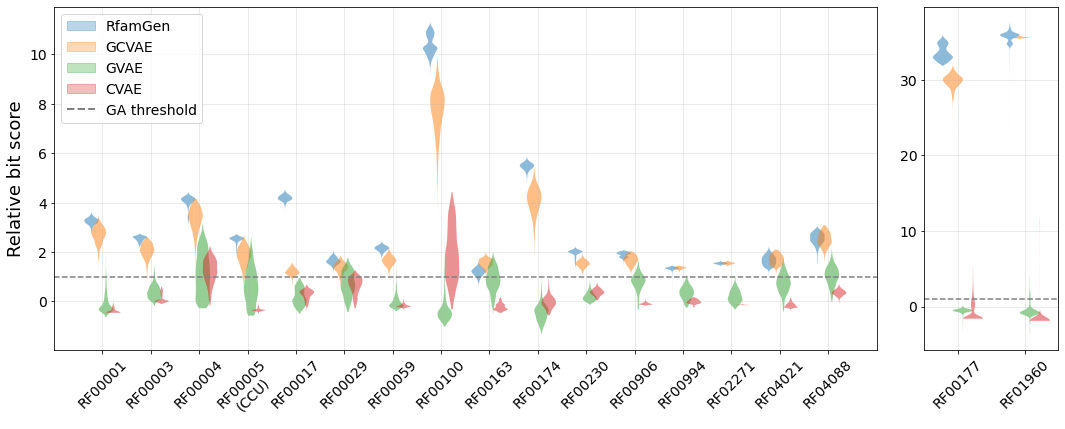

In [26]:
from matplotlib.lines import Line2D

labels = []

def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))
    return violin

    
rf_remove = ["RF00177", "RF01960"]

fig, axs = plt.subplots(1, 2, figsize=(18,7), gridspec_kw={'width_ratios': [8.6, 1.4]})

partss = []
partss.append(
    add_label(axs[0].violinplot(
    [v for k,v in model2bit["CMVAE"].items() if not k in rf_remove], [i-0.225 for i in range(18-len(rf_remove))], widths=0.3, showextrema = False
    ), "RfamGen")    
)
partss.append(
    add_label(axs[0].violinplot([v for k,v in model2bit["GCVAE"].items() if not k in rf_remove], [i-0.075 for i in range(18-len(rf_remove))], widths=0.3, showextrema = False), "GCVAE")    
)
partss.append(
    add_label(axs[0].violinplot([v for k,v in model2bit["GVAE"].items() if not k in rf_remove], [i+0.075 for i in range(18-len(rf_remove))], widths=0.3, showextrema = False), "GVAE")    
)
partss.append(
    add_label(axs[0].violinplot([v for k,v in model2bit["CVAE"].items() if not k in rf_remove], [i+0.225 for i in range(18-len(rf_remove))], widths=0.3, showextrema = False), "CVAE")
)

axs[0].plot([-1, 18-len(rf_remove)], [1,1], linestyle = "dashed", color = "gray", label = "GA threshold")
labels.append((Line2D([0], [0], color="gray", lw=2, linestyle="dashed"), "GA threshold"))

axs[0].grid(alpha = 0.3)
axs[0].set_xticks(range(18-len(rf_remove)));
axs[0].set_xlim(-1, 18-len(rf_remove));

axs[0].set_xticklabels(
    labels = [i.replace("_CCU", "\n(CCU)") for i in rfams if not i in rf_remove],
    rotation = 45,
    horizontalalignment = "center", # verticalalignment='top',
    fontsize = 14);
axs[0].legend(*zip(*labels), loc=2, fontsize = 14)
axs[0].tick_params(axis='both', labelsize=14)
axs[0].set_ylabel("Relative bit score", fontsize=18)



partss.append(
    add_label(axs[1].violinplot([v for k,v in model2bit["CMVAE"].items() if  k in rf_remove], [i-0.225 for i in range(len(rf_remove))], widths=0.3, showextrema = False), "RfamGen")    
)
partss.append(
    add_label(axs[1].violinplot([v for k,v in model2bit["GCVAE"].items() if  k in rf_remove], [i-0.075 for i in range(len(rf_remove))], widths=0.3, showextrema = False), "GCVAE")    
)
partss.append(
    add_label(axs[1].violinplot([v for k,v in model2bit["GVAE"].items() if  k in rf_remove], [i+0.075 for i in range(len(rf_remove))], widths=0.3, showextrema = False), "GVAE")    
)
partss.append(
    add_label(axs[1].violinplot([v for k,v in model2bit["CVAE"].items() if  k in rf_remove], [i+0.225 for i in range(len(rf_remove))], widths=0.3, showextrema = False), "CVAE")    
)
#axs[1].plot(y = 1, xmin = 0, xmax = 18-len(rf_remove), linestyle = "dashed", color = "gray", alpha = 0.7)
#labels.append((mpatches.Patch(color="0.7"), "GA threshold"))
axs[1].plot([-0.5, 1+0.5], [1,1], linestyle = "dashed", color = "gray", label = "GA threshold")


axs[1].grid(alpha = 0.3)
axs[1].set_xticks(range(len(rf_remove)));
axs[1].set_xlim(-0.5, 1+0.5);

axs[1].set_xticklabels(
    labels = [i.replace("_CCU", "\n(CCU)") for i in rfams if  i in rf_remove],
    rotation = 45,
    horizontalalignment = "center", # verticalalignment='top',
    fontsize = 14);
axs[1].tick_params(axis='both', labelsize=14)

for parts in partss:
    for pc in parts['bodies']:
        pc.set_alpha(0.5)


plt.subplots_adjust(wspace=0.1, hspace=0.1, bottom=0.2)
# plt.savefig("../../outputs/figures/figure2a.pdf",transparent = True)
plt.show()

TypeError: violinplot() got an unexpected keyword argument 'facecolor'

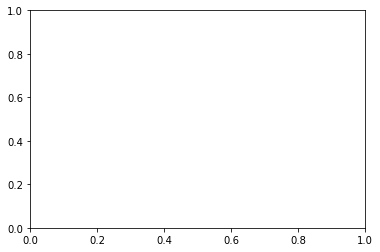

In [24]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# バイオリンプロットの描画
fig, ax = plt.subplots()
ax.violinplot(data, showmeans=False, showmedians=True, facecolor='blue')
